In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib

In [18]:
# Cargar datos
df = pd.read_csv('comprar_alquilar.csv')

In [19]:
# Preprocesamiento
df = pd.get_dummies(df, columns=['estado_civil', 'trabajo'], drop_first=True)
X = df.drop('comprar', axis=1)
y = df['comprar']

In [20]:
# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

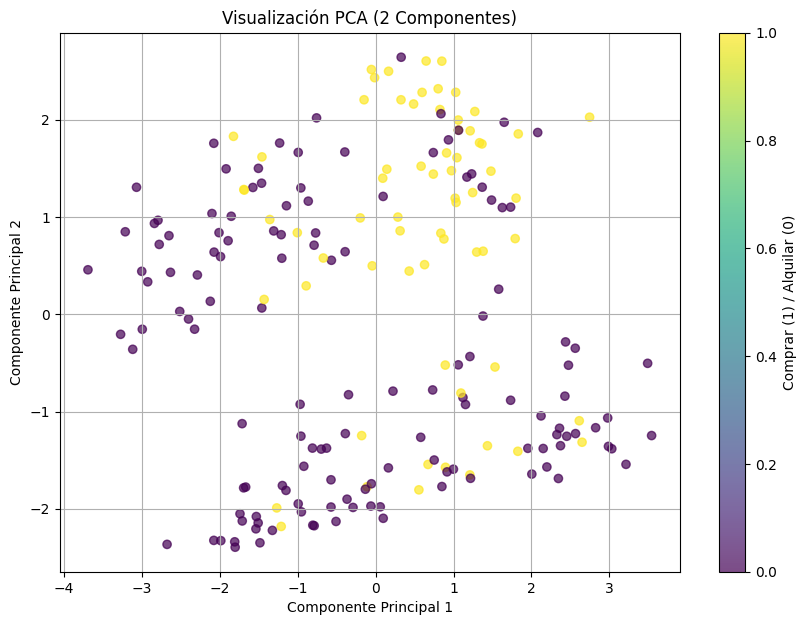

In [22]:
# Visualización PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Visualización PCA (2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Comprar (1) / Alquilar (0)')
plt.grid()
plt.show()

In [23]:
# Varianza explicada
print("Varianza explicada por componente:", pca.explained_variance_ratio_)

Varianza explicada por componente: [0.15810589 0.13029571]


In [24]:
# Clustering en espacio PCA
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

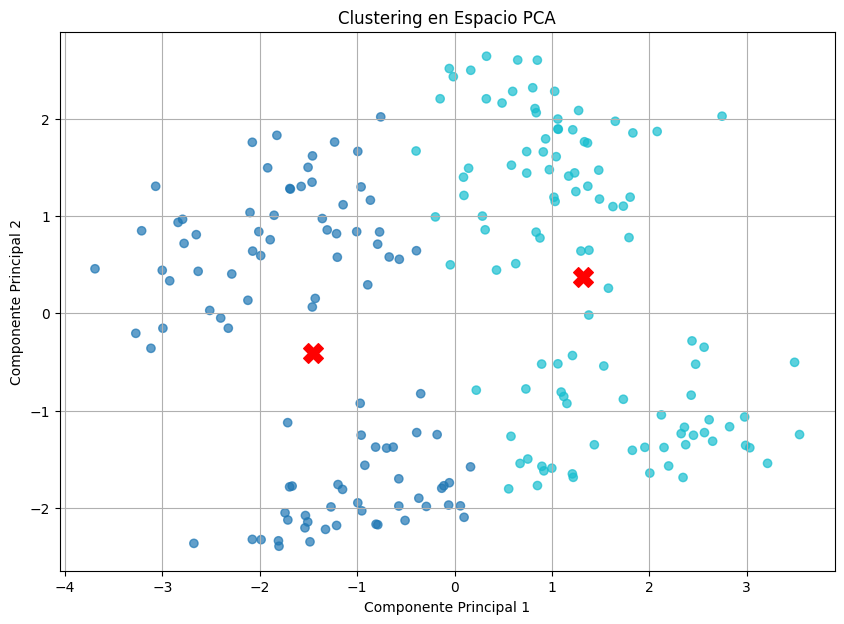

In [25]:
# Visualización clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X')
plt.title('Clustering en Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

In [26]:
# Guardar modelos
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']